## 분류

- 나이브 베이즈 : 베이즈 통계와 생성 모델에 기반
- 로지스틱 회귀 : 선형 관계
- 결정 트리 : 데이터 균일도에 따른 규칙 기반
- 서포트 벡터 머신 : 개별 클래스 간의 최대 분류 마진을 찾아줌
- 최소 근접 : 근접 거리 기준
- 신경망 : 심층 연결 기반
- 앙상블 : 서로 다른(같은) 머신러닝 알고리즘을 결합한 것

- 앙상블, 랜덤 포레스트, 그래디언트 부스팅, XGBoost, LightGBM

- 결정트리 : 데이터에 있는 규칙을 학습을 통해 자동으로 찾아냄.
- 규칙노드 : 규칙 조건, 리프 노드 : 규칙으로 결정된 클래스 값, 서브 트리
- 데이터 세트가 균일해야함. 정보의 균일도를 측정하는 방법 : 정보이득, 지니계수
- DecisionTreeClassifier : 정보이득이 높거나 지니 계수가 낮은 조건을 찾아서 반복 분할
- 룰이 명확하고, 시각화 가능. 전처리 작업 필요 없음. 단점은 과적합으로 정확도가 떨어진다는 것.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

In [7]:
pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------- --------------------- 20.5/47.0 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 593.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


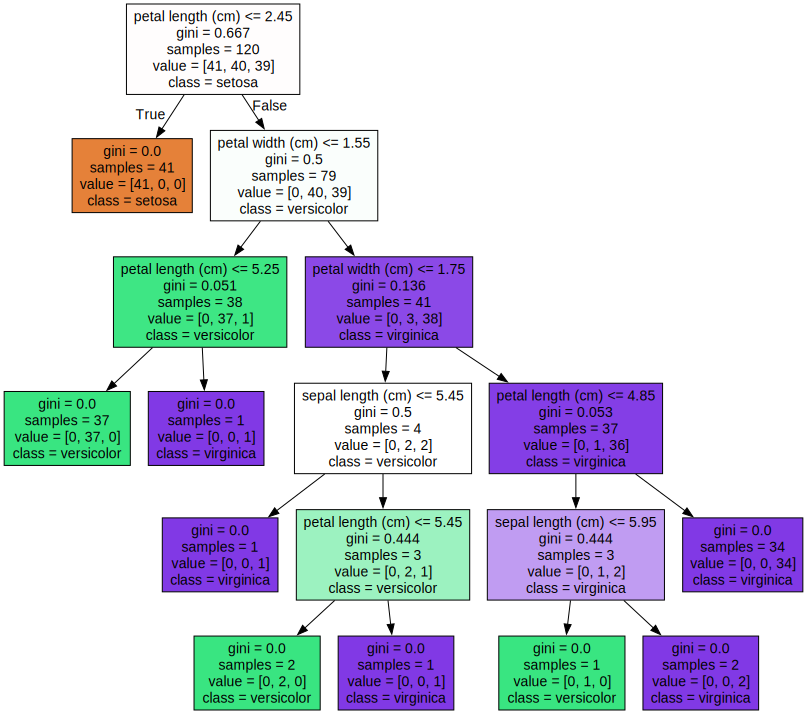

In [8]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [11]:
import seaborn as sns 
import numpy as np 

print(np.round(dt_clf.feature_importances_,3))

[0.025 0.    0.555 0.42 ]


트리의 시각화와 feature_importance 속성으로 결정트리 알고리즘 동작을 직관적으로 이해 가능

#### 결정 트리 과적합

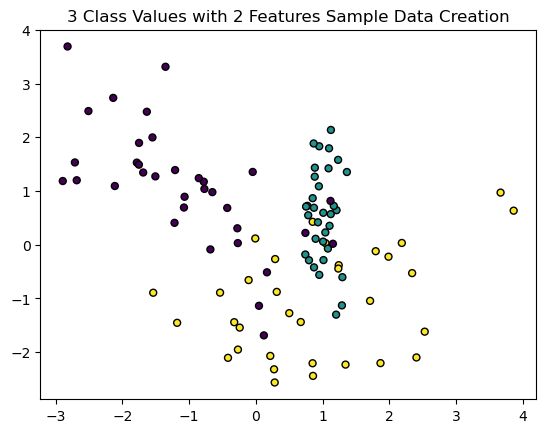

In [14]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt  

plt.title("3 Class Values with 2 Features Sample Data Creation")

# Creating sample data
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# Scatter plot
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')
plt.show()

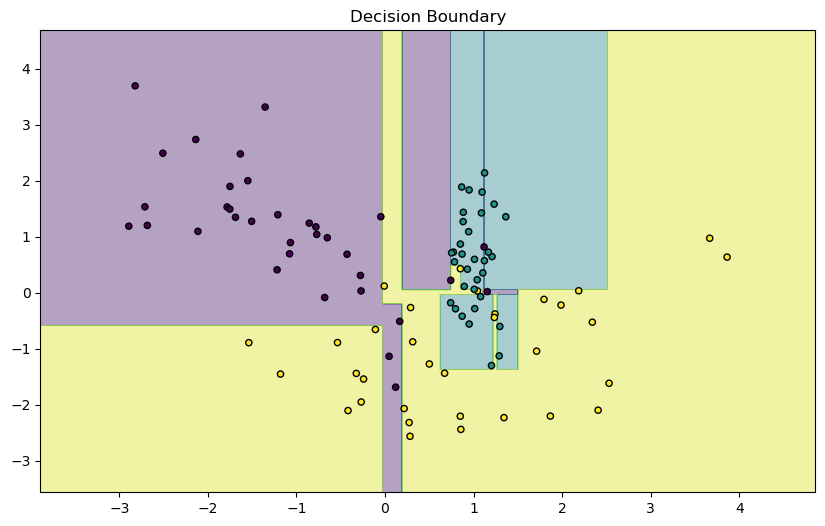

In [17]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def visualize_boundary(model, X, y):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict classifications for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the results
    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title("Decision Boundary")
    plt.show()
    
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

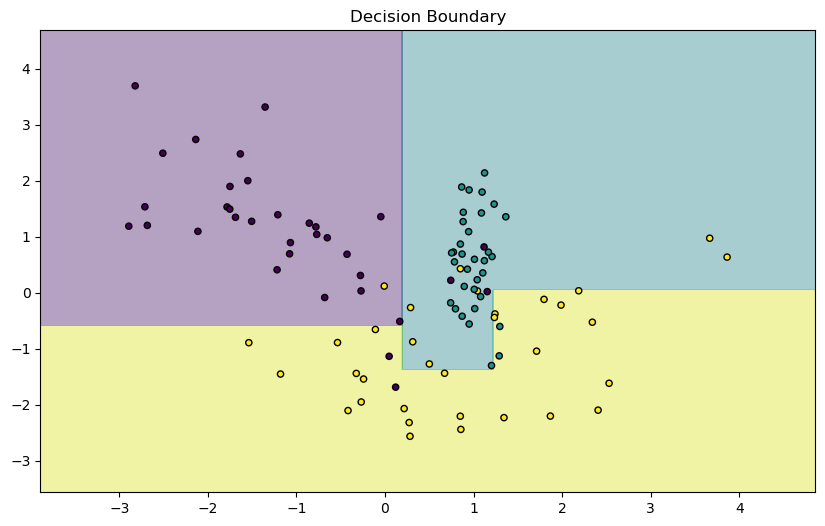

In [18]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def visualize_boundary(model, X, y):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict classifications for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the results
    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title("Decision Boundary")
    plt.show()
    
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 앙상블

- 앙상블 : 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법. 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것.
- 예시) 랜덤 포레스트, 그래디언트 부스팅, XGBoost, LightGBM

- 보팅 : 여러 개의 서로 다른 알고리즘을 가진 분류기가 투표를 통해 최종 예측 결과를 결정 - 하드 보팅(다수결), 소프트 보팅(레이블값과 결정 확률 모두 고려해서 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정 -> 하드보팅보다 성능 좋아 많이 채택)
- 배깅 : 여러 개의 같은 알고리즘을 가진 분류기가 서로 다른 데이터 샘플링을 학습해 보팅 수행하는 것 ex)랜덤 포레스트 / 부트스트래핑 방식 이용(무작위 복원 추출로 여러 개의 표본 만듦, 데이터 간 중복이 있음.(표본이 편향된 경우, 부정확한 결과 초래할 수도 있음) -> 복잡한 분포나 작은 데이터 셋일 대 유용)
- 부스팅 :

#### 1. 보팅 - VotingClassifier(LogisticRegression, KNeighborClassfier 이용)

In [20]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [21]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
accuracy_score(y_test, pred)

0.956140350877193

In [23]:
#개별 모델 학습 예측 평가
for classifier in [lr_clf, knn_clf] :
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(accuracy_score(y_test, pred))

0.9473684210526315
0.9385964912280702


#### 2.배깅 - 랜덤포레스트

여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤, 최종적으로 보팅으로 예측 결정.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

#### 3.부스팅 - GBM

부스팅 : 여러 개의 약한 학습기를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치를 부여하며 오류를 개선해나가는 학습 방식
- AdaBoost : 개별 학습기에 각각의 가중치 부여해서 결합
- GBM : 가중치 업데이트를 경사하강법 이용함, 오류를 최소화하는 방향성을 가지고 반복적으로 가중치 업데이트하는 '경사하강법' 이용